# PyKOALA Raw Stacked Spectra (RSS) 

## Table of contents:

1. [Importing class](#importing-class)
2. [Koala RSS](#koala-rss)
    - [`RSS` Attributes](#rss-attributes)
        - [General information](#general-information)
        - [History record](#history-record)
    - [Data methods](#data-methods)
        - [`is_corrected`](#is_corrected)
        - [`get_centre_of_mass`](#get_centre_of_mass)
        - [`update_coordinates`](#update_coordinates)
        - [`get_integrated_fibres`](#get_integrated_fibres)
        - [`to_fits`](#to_fits)
        - [`from_fits`](#from_fits)
    - [Plotting methods](#plotting-methods)
        - [`plot_rss_image`](#plot_rss_image)
        - [`plot_mask`](#plot_mask)
        - [`plot_fibres`](#plot_fibres)


## Importing class

**Note: Make sure to run the following cells in order to ensure correct execution.**

In [21]:
from pykoala.data_container import RSS
import os
from pykoala.instruments.koala_ifu import koala_rss
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

## Koala RSS

We can extract the RSS data using the function `koala_rss` in `koala_ifu`

In [22]:
data_path = '../data/koala/'
single_fits_sample = '385R/27feb20028red.fits'
os.system('pwd')
file_sample = os.path.join(data_path, single_fits_sample)
rss_sample = koala_rss(file_sample)

/home/mbolivar/pytutorials/pykoala-tutorials/tutorials/2-science-data
[pykoala] 2025/07/09 12:40|INFO> 
> Reading KOALA RSS file 27feb20028red.fits
[pykoala] 2025/07/09 12:40|INFO> No. of fibres in this RSS =1000
No. of good fibres = 986
No. of bad fibres = 14
[pykoala] 2025/07/09 12:40|INFO> Bad fibres = [109, 110, 235, 424, 574, 607, 675, 714, 721, 722, 723, 793, 950, 951]


  'Angstroms' -> 'Angstrom'. [astropy.wcs.wcs]


### RSS attributes

#### General information 

Information about the RRS can be obtained from the `info` attribute:

In [23]:
rss_sample.info

{'name': 'HILT600 A',
 'exptime': <Quantity 120. s>,
 'fib_ra': <Quantity [101.30856697, 101.30856639, 101.30856581, 101.30856523,
            101.30856465, 101.30826361, 101.30826419, 101.30826477,
            101.30826535, 101.30826592, 101.30796546, 101.30796488,
            101.3079643 , 101.30796372, 101.30796315, 101.3076621 ,
            101.30766268, 101.30766326, 101.30766384, 101.30736279,
            101.30736395, 101.30736337, 101.30766442, 101.30736222,
            101.30736164, 101.30706059, 101.30706117, 101.30706175,
            101.30706233, 101.30706291, 101.30676244, 101.30676186,
            101.30676129, 101.30676071, 101.30676013, 101.30645908,
            101.30645966, 101.30646024, 101.30646082, 101.3064614 ,
            101.30616093, 101.30616036, 101.30615978, 101.3061592 ,
            101.30615862, 101.30585758, 101.30585816, 101.30585873,
            101.30585931, 101.30585989, 101.30555943, 101.30555885,
            101.30555827, 101.30555769, 101.30555711,

The information is given as a dictionary:

In [24]:
rss_sample.info.keys()

dict_keys(['name', 'exptime', 'fib_ra', 'fib_dec', 'airmass'])

Intensity values can be shown with: 

In [25]:
rss_sample.intensity

<Quantity [[76.03494 , 85.01237 , 71.432556, ...,       nan,       nan,
                  nan],
           [62.802193, 51.24656 , 48.788467, ...,       nan,       nan,
                  nan],
           [69.09473 , 70.2224  , 75.24431 , ...,       nan,       nan,
                  nan],
           ...,
           [      nan,       nan,       nan, ...,       nan,       nan,
                  nan],
           [      nan,       nan,       nan, ...,       nan,       nan,
                  nan],
           [      nan,       nan,       nan, ...,       nan,       nan,
                  nan]] adu>

Intensity is saved as a `astropy` quantity, so we can extract its unit as an attribute:

In [26]:
units_intensity = rss_sample.intensity.unit
print(f'Unit of the intensity data is: {units_intensity}')

Unit of the intensity data is: adu


Similarly, with the variance of the RSS:

In [27]:
units_variance = rss_sample.variance.unit

print(f'Variance: {rss_sample.variance}')
print('\n================================\n')
print(f'Unit of the intensity data is: {units_variance}')

Variance: [[62.278034 67.22701  60.271008 ...       nan       nan       nan]
 [57.016464 50.034004 49.548775 ...       nan       nan       nan]
 [60.82069  60.351574 63.808174 ...       nan       nan       nan]
 ...
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]] adu2


Unit of the intensity data is: adu2


#### History record

RSS metada is stored as a `DataContainerHistory` object

In [28]:
rss_sample.history.show()

read: - RSS read from  27feb20028red.fits


#### RSS fibres

Information about the fibres can be obtained from here:

In [29]:
rss_sample.fibre_diameter

<Quantity 1.25 arcsec>

With `science_fibres` we can find the indexes of the fibres with non-bad pixels:

In [30]:
number_of_non_bad_fibres = len(rss_sample.science_fibres)
print(f'Indexes of non-bad fibers: {rss_sample.science_fibres}')
print('\n================================\n')
print(f'Number of non-bad fibers: {number_of_non_bad_fibres}')

Indexes of non-bad fibers: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239

### Data methods

#### `is_corrected`

We can check if a correction has been done in the RSS data with the `is_corrected` method: 

In [31]:
rss_sample.is_corrected(correction='read')

True

#### `get_centre_of_mass`

We can show the center of mass (COM) based on the RSS fibre positions:

In [32]:
rss_sample.get_centre_of_mass()

(<Quantity [101.30444649, 101.30432333, 101.30429272, ..., 101.30492832,
            101.30491107, 101.30492457] deg>,
 <Quantity [2.14407952, 2.14396867, 2.14391674, ..., 2.13781822, 2.13764745,
            2.13757106] deg>)

The first and second lists contain ra and dec coordinates, respectively.

#### `update_coordinates`

We can modify the fibres' coordinates with this method. First, let's check the original coordinates:

In [33]:
original_ra, original_dec = rss_sample.info["fib_ra"], rss_sample.info["fib_dec"]
print(f'Original RA fibres coordinates: {original_ra[:10]}')
print('\n================================\n')
print(f'Original DEC fibres coordinates: {original_dec[:10]}')

Original RA fibres coordinates: [101.30856697 101.30856639 101.30856581 101.30856523 101.30856465
 101.30826361 101.30826419 101.30826477 101.30826535 101.30826592] deg


Original DEC fibres coordinates: [2.1451103  2.14476298 2.14441567 2.14406836 2.14372104 2.14354791
 2.14389522 2.14424254 2.14458985 2.14493717] deg



Now we use `update_coordinates`:

In [34]:
rss_sample.update_coordinates(new_coords=(2*original_ra,2*original_dec))

[pykoala.pykoala.rss] 2025/07/09 12:40|INFO> [RSS] Offset-coords updated


In [35]:
print(f'Updated RA fibres coordinates: {rss_sample.info["fib_ra"][:10]}')
print('\n================================\n')
print(f'Updated DEC fibres coordinates: {rss_sample.info["fib_dec"][:10]}')

Updated RA fibres coordinates: [202.61713394 202.61713278 202.61713162 202.61713046 202.61712931
 202.61652722 202.61652838 202.61652953 202.61653069 202.61653185] deg


Updated DEC fibres coordinates: [4.2902206  4.28952597 4.28883134 4.28813671 4.28744209 4.28709582
 4.28779045 4.28848508 4.2891797  4.28987433] deg


#### `get_integrated_fibres`

We compute the integrated intensity of the RSS fibres with this method:

In [36]:
rss_sample.get_integrated_fibres()

(<Quantity [  196862.81 ,   158957.27 ,   201256.66 ,   164849.48 ,
              197449.95 ,   163395.06 ,   196560.7  ,   163992.55 ,
              199036.95 ,   178030.2  ,   133986.77 ,   162544.67 ,
              194597.22 ,   166901.02 ,   192438.55 ,   169063.81 ,
              197178.3  ,   161257.33 ,   195972.11 ,   159103.44 ,
              198417.72 ,    76723.05 ,   195714.44 ,   143426.25 ,
              191437.64 ,   179585.48 ,   143539.81 ,   163649.2  ,
              132976.38 ,   185408.73 ,   141668.56 ,   179490.16 ,
              151899.98 ,   189643.14 ,   154321.98 ,   195767.55 ,
              154005.11 ,   186491.66 ,   144470.6  ,   186383.92 ,
              155026.88 ,   184464.39 ,   149819.44 ,   173370.44 ,
              149137.94 ,   189565.52 ,   144265.34 ,   187237.52 ,
              159936.39 ,   189275.86 ,   186385.61 ,   167713.33 ,
              186704.39 ,   167051.72 ,   189284.86 ,   167979.9  ,
              183607.52 ,   164419.38 ,   184506

We can also constraint the calculation in a specific wavelength.

In [37]:
rss_sample.wavelength

<Quantity [6080.9588623 , 6082.53404462, 6084.10922693, ..., 9302.20669104,
           9303.78187335, 9305.35705566] Angstrom>

Now we select the wavelenght range. **Make sure to use astropy quantities and not simple float values.** 

In this case we will use the same elements of the RSS wavelengh data to define the range.

In [38]:
rss_sample.get_integrated_fibres(wavelength_range=[6000,7000])

(<Quantity [   59750.727,    48632.29 ,    60867.457,    50110.527,
               59359.55 ,    49387.86 ,    59602.08 ,    50064.516,
               60149.312,    54146.867,    40246.363,    49889.38 ,
               58979.746,    50913.65 ,    58135.53 ,    51447.934,
               59601.5  ,    49448.64 ,    58992.45 ,    48364.01 ,
               60231.086,    22851.848,    59122.14 ,    43565.58 ,
               57541.8  ,    55238.383,    43643.523,    48997.06 ,
               40580.79 ,    56358.32 ,    43182.79 ,    54708.504,
               46429.13 ,    57410.773,    47280.39 ,    59538.504,
               46102.734,    56834.297,    44097.64 ,    56675.98 ,
               47366.84 ,    56083.527,    47448.47 ,    52663.566,
               45278.215,    57734.125,    45509.81 ,    57065.285,
               48801.387,    56739.168,    56854.098,    50751.023,
               55992.223,    50901.727,    57027.08 ,    51333.016,
               55414.61 ,    49973.156,    55996

#### `to_fits`

We can write the RSS into a FITS file with this method.  

In [39]:
path_output = './output/'
os.system('pwd')
fits_file_path = path_output + 'rss_sample.fits'
rss_sample.to_fits(filename=fits_file_path,overwrite=True)

/home/mbolivar/pytutorials/pykoala-tutorials/tutorials/2-science-data
[pykoala.pykoala.rss] 2025/07/09 12:40|INFO> File saved as ./output/rss_sample.fits


Notice that the format of the FITS file is different from the original.

#### `from_fits` 

This FITS format can be read with this method:

In [40]:
new_rss_sample = RSS.from_fits(filename=fits_file_path)

Note that we call this method from the RSS class, as oposed as from the object like the previous methods shown here.

The new object has the same properties as `rss_sample`:

In [41]:
new_rss_sample.info

{'fib_ra': <Quantity [202.61713394, 202.61713278, 202.61713162, 202.61713046,
            202.61712931, 202.61652722, 202.61652838, 202.61652953,
            202.61653069, 202.61653185, 202.61593092, 202.61592976,
            202.61592861, 202.61592745, 202.61592629, 202.6153242 ,
            202.61532536, 202.61532652, 202.61532768, 202.61472559,
            202.6147279 , 202.61472675, 202.61532883, 202.61472443,
            202.61472327, 202.61412119, 202.61412234, 202.6141235 ,
            202.61412466, 202.61412582, 202.61352489, 202.61352373,
            202.61352257, 202.61352141, 202.61352026, 202.61291817,
            202.61291933, 202.61292048, 202.61292164, 202.6129228 ,
            202.61232187, 202.61232071, 202.61231955, 202.6123184 ,
            202.61231724, 202.61171515, 202.61171631, 202.61171747,
            202.61171863, 202.61171978, 202.61111885, 202.6111177 ,
            202.61111654, 202.61111538, 202.61111422, 202.61051214,
            202.61051329, 202.61051445

In [42]:
comparing_intensity_values = np.array_equal(new_rss_sample.intensity,rss_sample.intensity,equal_nan=True)
comparing_variance_values = np.array_equal(new_rss_sample.variance,rss_sample.variance,equal_nan=True)
print(f"Comparing intensity values: {comparing_intensity_values}")
print(f"Comparing variance values: {comparing_variance_values}")

Comparing intensity values: True
Comparing variance values: True


### Plotting methods

We can directly do RSS related plots with the following methods  

#### `plot_rss_image`

Plot of basic RSS properties:

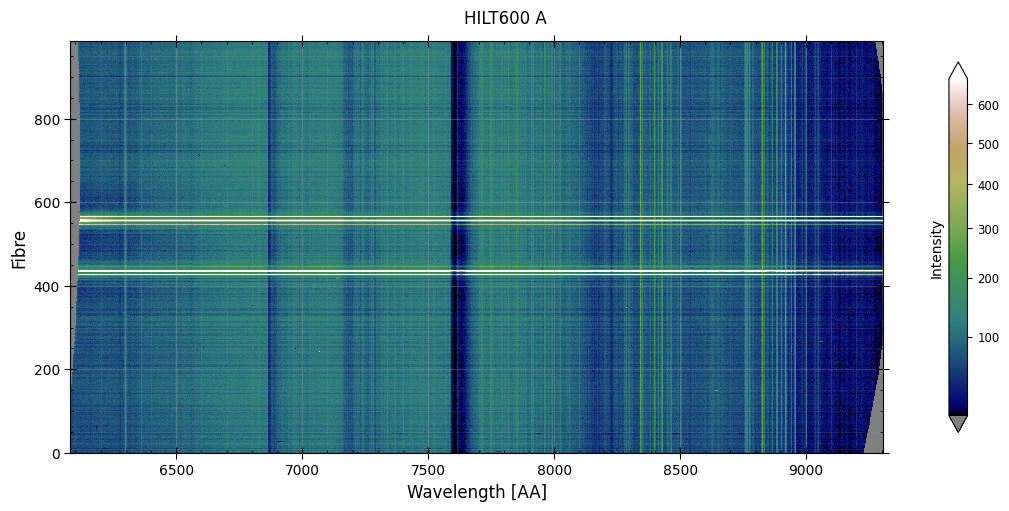

In [43]:
rss_sample.plot_rss_image()

plt.xlabel("Wavelength [AA]",fontsize=12)
plt.ylabel("Fibre",fontsize=12)
plt.show()

Custom version:

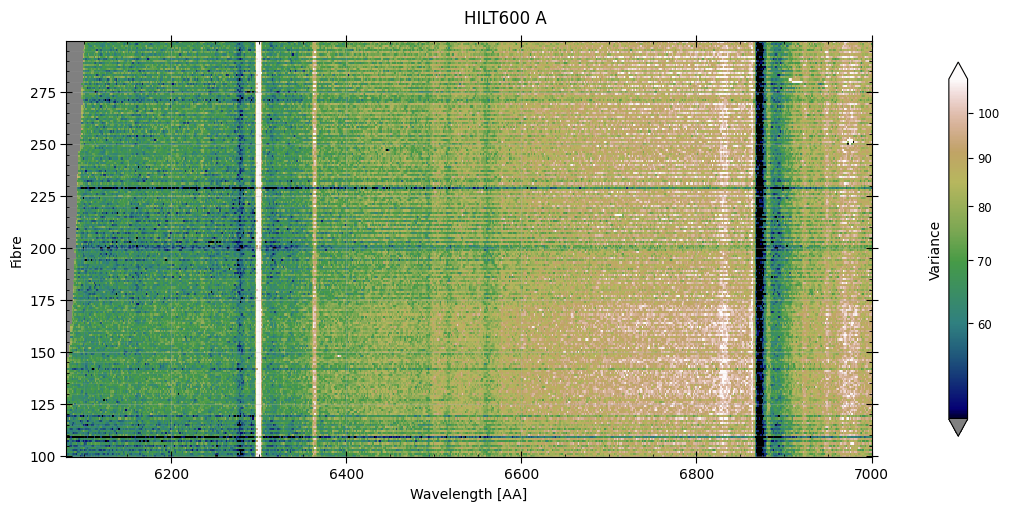

In [44]:

plot_file_path = path_output + '/custom_plot_rss_image.png'
rss_sample.plot_rss_image(data=rss_sample.variance.value, data_label='Variance',fibre_range=(100,300),
                            wavelength_range=(6000,7000),output_filename=plot_file_path)
plt.show()

#### `plot_mask`

This method creates a plot of the bitmask data:

[]

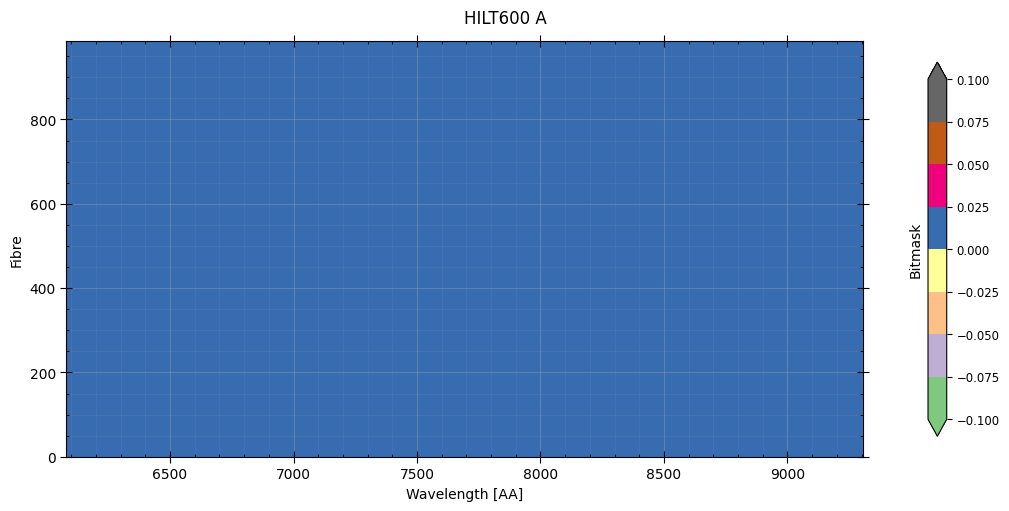

In [45]:
rss_sample.plot_mask()
plt.plot()

#### `plot_fibres`

This methods plots a fibre map image, showing the spatial distribution of data across fibres.

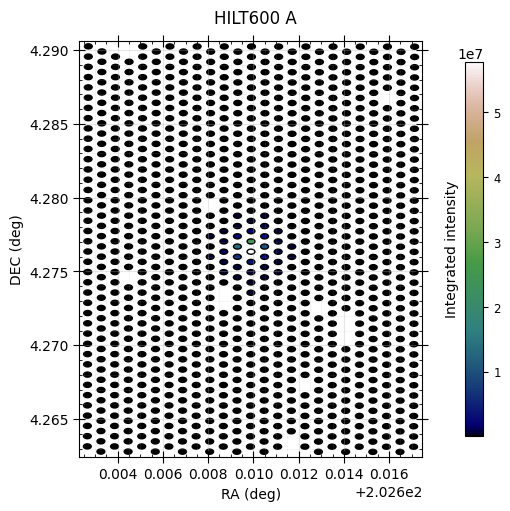

In [46]:
rss_sample.plot_fibres()
plt.show()